# Recurrent Neural Networks


In [1]:
# RNN from scratch
%matplotlib inline
import numpy as np
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
print "INPUTS\n", inputs, "\nshape", np.shape(inputs)
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
print "W shape", np.shape(W)
U = np.random.random((output_features, output_features))
print "U shape", np.shape(W)
b = np.random.random((output_features,))
print "b shape", np.shape(W)

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis=0)
print "Final shape",np.shape(final_output_sequence)

INPUTS
[[0.59363428 0.10770713 0.07946329 ... 0.77629056 0.20931953 0.26215807]
 [0.49557806 0.27773574 0.3845138  ... 0.99994428 0.70575074 0.51252065]
 [0.67730598 0.90012071 0.52863081 ... 0.73826099 0.42442088 0.13958657]
 ...
 [0.19701306 0.03312463 0.20636439 ... 0.77731013 0.97816818 0.11240423]
 [0.79719113 0.20894819 0.89448902 ... 0.89062755 0.54543168 0.79426139]
 [0.9813475  0.58463016 0.05863204 ... 0.51692965 0.04523177 0.01003126]] 
shape (100, 32)
W shape (64, 32)
U shape (64, 32)
b shape (64, 32)
Final shape (6400,)


### Let's import dataset and vectorize it
Construct an example of RNN in keras

In [6]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500 # max length of words per review
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')

print input_train
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
print "After pad sequence\n", input_train[2499:]
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
(25000, 'train sequences')
(25000, 'test sequences')
Pad sequences (samples x time)
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4

### Create the model

In [3]:
from keras.layers import Dense, Embedding, SimpleRNN
from keras.models import Sequential


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                epochs=10,
                batch_size=128,
                validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 18s 905us/step - loss: 0.6420 - acc: 0.6125 - val_loss: 0.5388 - val_acc: 0.7438
Epoch 2/10
20000/20000 [==============================] - 17s 873us/step - loss: 0.4128 - acc: 0.8202 - val_loss: 1.1643 - val_acc: 0.5558
Epoch 3/10
20000/20000 [==============================] - 17s 863us/step - loss: 0.2966 - acc: 0.8810 - val_loss: 0.3591 - val_acc: 0.8552
Epoch 4/10
20000/20000 [==============================] - 17s 846us/step - loss: 0.2130 - acc: 0.9179 - val_loss: 0.4019 - val_acc: 0.8258
Epoch 5/10
20000/20000 [==============================] - 17s 864us/step - loss: 0.1497 - acc: 0.9464 - val_loss: 0.3686 - val_acc: 0.8670
Epoch 6/10
20000/20000 [==============================] - 17s 855us/step - loss: 0.0957 - acc: 0.9686 - val_loss: 0.3972 - val_acc: 0.85

### Plot results

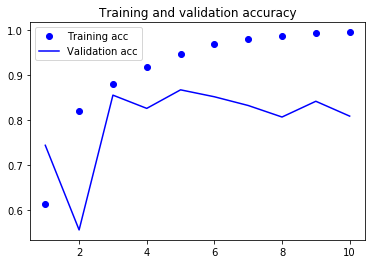

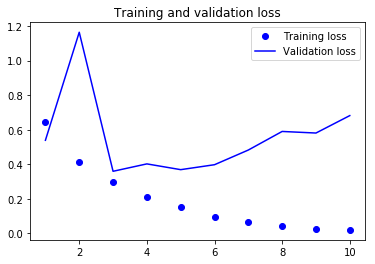

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()